# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Comité de Suivi - Open AI Embeddings

---

# Observations et environnement
---

## Environnement

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## Données

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

In [5]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [6]:
df_label[labels].describe()

,infox,entites_nommees,ouverture_esprit,faits,opinions,propos_raportes,sources_citees,fausse_nouvelle,insinuations,exageration
count,900.000000,804.000000,803.000000,804.000000,804.000000,803.000000,803.000000,802.000000,802.000000,552.000000
mean,0.414444,0.618159,0.063512,0.717662,0.547264,0.244085,0.400996,0.152120,0.331671,0.317029
std,0.492900,0.486140,0.244033,0.450417,0.498071,0.429811,0.490406,0.359361,0.471107,0.465741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Urls duppliquées

In [7]:
df_label.duplicated(subset='url').sum()

0

### Sites

In [8]:
df_label.value_counts('site')

site
www.francesoir.fr                    169
www.francetvinfo.fr                   91
www.breizh-info.com                   66
www.wikistrike.com                    62
lezarceleurs.blogspot.com             58
lesmoutonsrebelles.com                47
lemediaen442.fr                       32
www.profession-gendarme.com           28
lesdeqodeurs.fr                       28
fr.sott.net                           26
www.dreuz.info                        25
www.lelibrepenseur.org                23
www.polemia.com                       19
reseauinternational.net               17
actu.fr                               17
www.mondialisation.ca                 16
www.nouvelordremondial.cc             14
lesakerfrancophone.fr                 13
www.lesalonbeige.fr                   13
www.voltairenet.org                   12
lesobservateurs.ch                     9
www.anguillesousroche.com              9
lecourrier-du-soir.com                 9
www.cnews.fr                           9
www.preuves

# Experience
---

## Test Gpt class

In [9]:
import patat.model.gpt

In [10]:
gpt = patat.model.gpt.Gpt()

In [11]:
gpt.get_embeddings('Ceci est une première phrase')

[0.0016411488177254796,
 -0.0010852506384253502,
 -0.00856333039700985,
 -0.013241618871688843,
 -0.006602071691304445,
 0.044471852481365204,
 -0.020362112671136856,
 -0.012460863217711449,
 -0.0042316969484090805,
 -0.019687538966536522,
 0.02103668637573719,
 0.03625205531716347,
 -0.0185882356017828,
 -0.011486480012536049,
 0.005518382415175438,
 -0.018063567578792572,
 0.054015811532735825,
 -0.002133025089278817,
 0.00968137290328741,
 0.014315939508378506,
 -1.6652058548061177e-05,
 -0.012054869905114174,
 0.0169642623513937,
 -0.010799414478242397,
 -0.01121789962053299,
 -0.014028620906174183,
 -0.0007729483186267316,
 -0.008394686505198479,
 0.01425347849726677,
 -0.018962997943162918,
 -0.004809455946087837,
 -0.008575822226703167,
 0.009206673130393028,
 -0.02298545278608799,
 -0.007420303765684366,
 0.0007108782301656902,
 -0.0004395655414555222,
 1.7359618141199462e-05,
 -0.004753241781145334,
 -0.006570841185748577,
 0.02813219465315342,
 0.015415243804454803,
 0.019787

## Calcul embeddings pour les textes

In [12]:
df_label[df_label['c_count']>10_000]

,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,author,...,inversion_preuve,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h
8,https://lesmoutonsrebelles.com/biden-utilise-c...,lesmoutonsrebelles.com,Biden utilise cyniquement l’Ukraine pour couvr...,par F. William Engdahl.Il commence à sembler q...,[],"[par F. William Engdahl., Il commence à semble...",,,,,...,0.0,NaN,2,FB,Recueil,21,Biden utilise cyniquement l’Ukraine pour couvr...,14071,670.047619,5b0ad37059122c3d858d6c824cb8c4c67d937e00
12,https://lesmoutonsrebelles.com/la-variole-du-s...,lesmoutonsrebelles.com,"La variole du singe : « Trompe-moi deux fois, ...",par Mike Whitney.« Je n’arrive pas à croire qu...,[],"[par Mike Whitney., « Je n’arrive pas à croire...",,,Mike Whitney,,...,0.0,NaN,2,FB,Recueil,46,"La variole du singe : « Trompe-moi deux fois, ...",13958,303.434783,6fb03319309fa94359995425ce698802a86e592b
13,https://lesmoutonsrebelles.com/9-exemples-de-d...,lesmoutonsrebelles.com,9 exemples de désinformation des autorités de ...,par Julie Lévesque.Le chef de la santé publiqu...,[],"[par Julie Lévesque., Le chef de la santé publ...",,,Julie Levesque,,...,1.0,NaN,1,FB,Recueil,33,9 exemples de désinformation des autorités de ...,10134,307.090909,ace841ea8918d84196b6a88bae0c3859b8c2c976
16,https://www.mondialisation.ca/propagande-covid...,www.mondialisation.ca,Propagande Covid délirante pour des masques in...,Depuis quelques jours le gouvernement et les m...,"[L'Europe, Science et médecine, COVID-19]",[Depuis quelques jours le gouvernement et les ...,2022-12-08T00:00:00,,Dr Gérard Delépine,Dr Gérard Delépine,...,0.0,0.0,1,FB,Recueil,106,Propagande Covid délirante pour des masques in...,25692,242.377358,92cd9577a0be7ec9906078297baaef7190086125
19,https://www.mondialisation.ca/la-nouvelle-gene...,www.mondialisation.ca,La nouvelle génération rejette l’Europe d’Ursu...,En rentrant à mon bureau un soir de septembre ...,"[L'Europe, Russie et CEI, Désinformation média...",[En rentrant à mon bureau un soir de septembre...,2022-08-25T00:00:00,,Dr Eric Beeth,Dr. Eric Beeth,...,0.0,0.0,1,FB,Recueil,50,La nouvelle génération rejette l’Europe d’Ursu...,16568,331.360000,913df3bc935dddb01172d4fa39d1c9c5789d9f21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,https://lezarceleurs.blogspot.com/2021/07/usa-...,lezarceleurs.blogspot.com,USA- Infirmités post-vaccinales. Des sénateurs...,De : https://childrenshealthdefense.org/defend...,"[accident après essai clinique AstraZenzca, CI...",[De : https://childrenshealthdefense.org/defen...,,,NaN,,...,NaN,NaN,NaN,NaN,Verif,35,USA- Infirmités post-vaccinales. Des sénateurs...,10063,287.514286,d8eddaddb1f7559f931565157be1c2a72e71ed9e
894,https://www.wikistrike.com/2019/06/vers-le-tou...,www.wikistrike.com,Vers le tout chimique: La France se dirige dro...,"Sans surprise, la Haute Autorité de Santé (HAS...",[#Santé - psychologie],"[Sans surprise, la Haute Autorité de Santé (HA...",2019-06-29T00:00:00,,NaN,,...,NaN,NaN,NaN,NaN,Verif,47,Vers le tout chimique: La France se dirige dro...,18465,392.872340,b7d873e60bf3de9e9c122e2f5789a87142380baf
895,https://www.francesoir.fr/opinions-tribunes/le...,www.francesoir.fr,Les dangers de la numérisation du monde,"Tribune : Valérie Chénard, psychologue sociale...","[Accueil, Opinions]","[Tribune : Valérie Chénard, psychologue social...",2020-12-26T16:30:00,,NaN,"Auteur(s)\nValérie Chénard, pour FranceSoir",...,NaN,NaN,NaN,NaN,Verif,103,Les dangers de la numérisation du monde\nTribu...,39242,380.990291,8166dfd164781729401c9657c39ac0f5db4b2aa2
897,https://www.francesoir.fr/politique-monde/les-...,www.francesoir.fr,"Les mystères du masque, entre déraison, soumis...",TRIBUNE : Le sourire est une énergie très puis...,"[Accueil, Politique, Monde]",[TRIBUNE : Le sourire est une énergie très pui...,,,NaN,,...,NaN,NaN,NaN,NaN,Verif,141,"Les mystères du masque, entre déraison, soumis...",33908,240.482270,d2a469e64d6088c01f6474413a

Focalisation sur les 13 premiers paragraphes + titre + abstract

In [41]:
p_count = 17
def partial_texts(text):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [42]:
df_label['p_text'] = df_label['text'].apply(partial_texts)

In [43]:
df_label['p_c_count']=df_label['p_text'].apply(len)

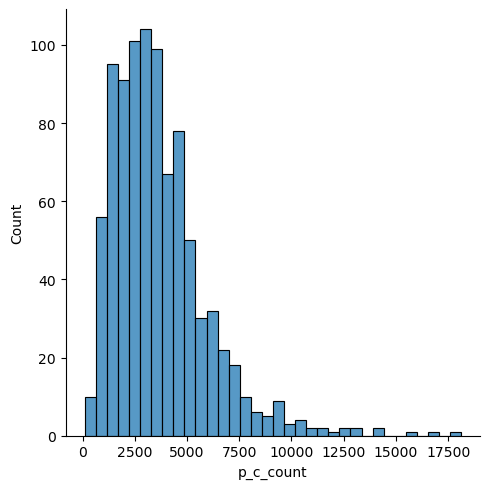

In [44]:
sns.displot(df_label['p_c_count'])

In [45]:
df_label['embeddings17']=df_label['p_text'].progress_apply(gpt.get_embeddings)

  0%|          | 0/904 [00:00<?, ?it/s]

## Prédiction liste de labels

In [46]:
labels = ['infox', 'entites_nommees', 'ouverture_esprit', 'faits', 'opinions',
       'propos_raportes', 'sources_citees', 'fausse_nouvelle', 'insinuations',
       'exageration', ]

In [47]:
df_ml = df_label

In [48]:
def get_df_ml(label,df_label):
    return df_label[df_label[label].notna()]

In [49]:
def get_balanced_df_ml(label,df_label):
    df_0 = df_label[df_label[label] == 0]
    df_1 = df_label[df_label[label] == 1]
    min_sample = min(len(df_0),len(df_1))
    df_0=df_0.sample(min_sample,random_state=_rs)
    df_1=df_1.sample(min_sample,random_state=_rs)
    df_ml = pd.concat([df_0,df_1])
    df_ml = df_ml.sample(frac=1,random_state=_rs)
    return df_ml

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split

In [60]:
def get_scores(label,df_ml):
    logreg = LogisticRegression(C=100, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
    matrix = np.array([r['embeddings17'] for i,r in df_ml.iterrows()])
    X = pd.DataFrame(matrix)
    y = df_ml[label]
    classifier = logreg
    scores = cross_validate(classifier, X, y, cv=4,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    score_dic = df_scores.mean().to_dict()
    score_dic['label']=label
    score_dic['n_samples']=len(df_ml)
    return score_dic

In [61]:
score_list = []
for label in labels:
    print(f'Processing {label}')
    df_ml = get_balanced_df_ml(label,df_label)
    score_list.append(get_scores(label,df_ml))

Processing infox
Processing entites_nommees
Processing ouverture_esprit
Processing faits
Processing opinions
Processing propos_raportes
Processing sources_citees
Processing fausse_nouvelle
Processing insinuations
Processing exageration


In [62]:
df_results = pd.DataFrame(score_list).set_index('label')

In [63]:
pd.set_option('display.precision',3)

In [64]:
df_results.drop(columns=['fit_time','score_time'])

,test_roc_auc,test_f1,test_accuracy,test_precision,test_recall,n_samples
label,,,,,,
infox,0.865,0.774,0.779,0.792,0.759,746
entites_nommees,0.732,0.663,0.668,0.675,0.655,614
ouverture_esprit,0.612,0.519,0.549,0.548,0.511,102
faits,0.654,0.605,0.610,0.611,0.600,454
opinions,0.689,0.636,0.637,0.636,0.637,728
propos_raportes,0.685,0.643,0.640,0.638,0.653,392
sources_citees,0.636,0.599,0.607,0.613,0.587,644
fausse_nouvelle,0.661,0.635,0.639,0.641,0.631,244
insinuations,0.770,0.667,0.664,0.660,0.676,532


/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_7420/1380019141.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'infox'),
 Text(1, 0, 'entites_nommees'),
 Text(2, 0, 'ouverture_esprit'),
 Text(3, 0, 'faits'),
 Text(4, 0, 'opinions'),
 Text(5, 0, 'propos_raportes'),
 Text(6, 0, 'sources_citees'),
 Text(7, 0, 'fausse_nouvelle'),
 Text(8, 0, 'insinuations'),
 Text(9, 0, 'exageration')]

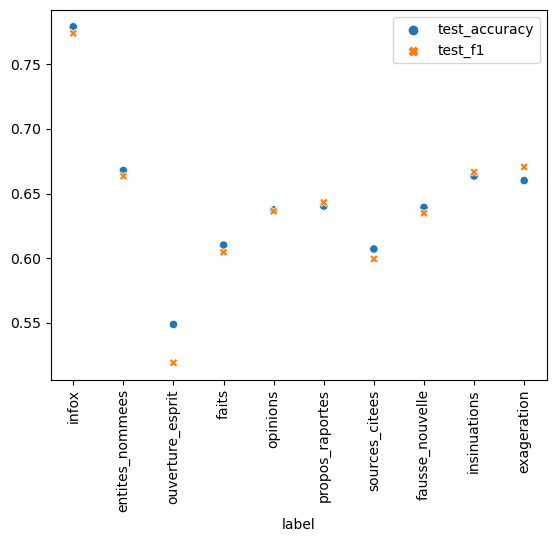

In [65]:
plot = sns.scatterplot(df_results[['test_accuracy','test_f1']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_7420/617114656.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'infox'),
 Text(1, 0, 'entites_nommees'),
 Text(2, 0, 'ouverture_esprit'),
 Text(3, 0, 'faits'),
 Text(4, 0, 'opinions'),
 Text(5, 0, 'propos_raportes'),
 Text(6, 0, 'sources_citees'),
 Text(7, 0, 'fausse_nouvelle'),
 Text(8, 0, 'insinuations'),
 Text(9, 0, 'exageration')]

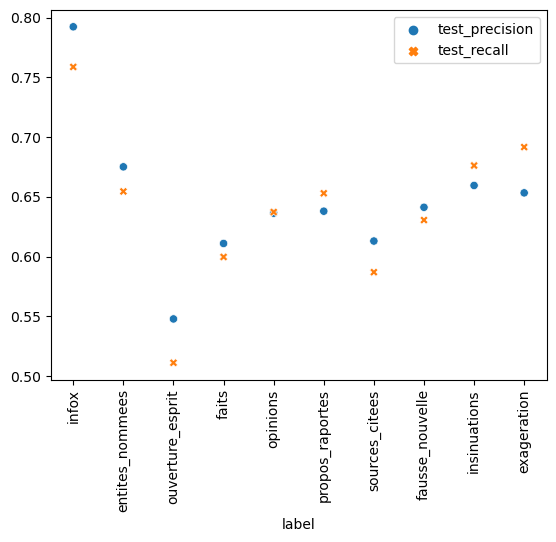

In [66]:
plot = sns.scatterplot(df_results[['test_precision','test_recall']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---